<AxesSubplot:>

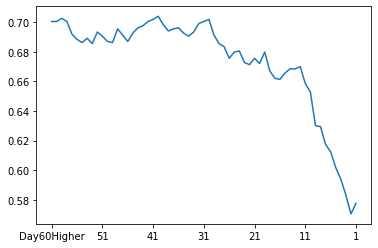

In [4]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from sklearn import preprocessing,svm,model_selection
from matplotlib import style



#######################################################################################################
# Get ticker's info
#######################################################################################################


#define the ticker symbol
tickerSymbol = 'ARKK'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
df = tickerData.history(period='1d', start='2010-1-1', end='2020-10-09')

#rearrange columns to better view
df['Year']=df.index.year
df['Month']=df.index.month


#######################################################################################################
# Add intereted columns
#######################################################################################################

#P means Period
Periods=[5,10,20,30]


#Create SMA columns
for p in Periods:
    df['Close_SMA'+str(p)] = df.iloc[:,0].rolling(window=p).mean()

#Create SMA conventional buying signal columns
for p in Periods:
    df['SMA'+str(p)+'_Buy'] = np.where((df['Close'] >= df['Close_SMA'+str(p)]) , 1, 0)


#Add columns to show the price action n-th day later  
#find if the price n-th days later is higher than current price
# e.g. n=5, means check if the price 5 days later will higher than current price
ObserveDayRange=60

for NDaysLater in range(1,ObserveDayRange+1):
    df['Day'+str(NDaysLater)]=df['Close'].shift(periods=-NDaysLater)
    df['Day'+str(NDaysLater)+'Higher'] = np.where((df['Day'+str(NDaysLater)] >= df['Close']) , 1, 0)
    
    
    
#Decide how many days later you want to comapre
#NDaysLater=27


#find if the price n-th days later is higher than current price
# e.g. n=5, means check if the price 5 days later will higher than current price
#df['Day'+str(NDaysLater)]=df['Close'].shift(periods=-NDaysLater)
#df['Day'+str(NDaysLater)+'Higher'] = np.where((df['Day'+str(NDaysLater)] >= df['Close']) , 1, 0)



#######################################################################################################
# Tidy up the dataframe after adding multiple columns
#######################################################################################################

df2=df.copy()
df2.dropna(inplace=True)



#######################################################################################################
# Check Reuslt
#######################################################################################################

#Get basic stat, mean is the probability you may concern
#df[['column11','column2'].describe

dfStat=df2[[ 'Day'+str(ObserveDayRange)+'Higher']].describe().loc[['count','mean']]


for i in range(ObserveDayRange,0,-1):    
    #dfStat['Day'+str(i)+'Higher']=df2[[ 'Day'+str(i)+'Higher']].describe().loc[['count','mean']]
    dfStat[str(i)]=df2[[ 'Day'+str(i)+'Higher']].describe().loc[['count','mean']] # better looking at x-axis
    

test=dfStat.T

test['mean'].plot()

In [22]:

#######################################################################################################
# Syntax you may find useful
#######################################################################################################


#df2.groupby('Close').sum()

#df2.groupby('Day'+str(NDaysLater)+'Higher')['Day'+str(NDaysLater)+'Higher'].sum()
#df3=df2.groupby('Day'+str(NDaysLater)+'Higher').agg({'Day'+str(NDaysLater)+'Higher': 'sum'})
#df3['Count']=df2['Day'+str(NDaysLater)+'Higher'].count()
#df3['Perentage']=df3['Day'+str(NDaysLater)+'Higher']/df3['Count']
#df2


#select a time range to reviw the data

#SQL selct Close,Day5 from df where Close>19 and Day5Higher=1
#df[(df.Close>19) & (df.Day5Higher==1)][['Close','Day5']]



sales
state office_id        
AZ    2          222579
      4          252315
      6          835831
CA    1          405711
      3          710581
      5          982371
CO    1          404137
      3          217952
      5          474564
WA    2          535829
      4          548242
      6          459783

In [4]:

#######################################################################################################
# Testing Block
#######################################################################################################


from sklearn import preprocessing
import numpy as np

# 创建一组特征数据，每一行表示一个样本，每一列表示一个特征
x = np.array([[1., -1., 2.],
              [1., 0., 0.],
              [1., 0., 0.],
              [0., 1., -1.]])

# 将每一列特征标准化为标准正太分布，注意，标准化是针对每一列而言的
x_scale = preprocessing.scale(x)

x_scale

array([[ 0.57735027, -1.41421356,  1.60591014],
       [ 0.57735027,  0.        , -0.22941573],
       [ 0.57735027,  0.        , -0.22941573],
       [-1.73205081,  1.41421356, -1.14707867]])